In [1]:
# importing the Dataset

import pandas as pd

messages = pd.read_csv('F:\Python\Jupyter notebook\DataSets\SMSSpamCollection', sep='\t', names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
messages.shape

(5572, 2)

In [3]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

print(messages.isnull().sum()) # there are no null values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jitesh\AppData\Roaming\nltk_data...


label      0
message    0
dtype: int64


[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i]) #replace chars other than alphabets with spaces
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [17]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
# cv.vocabulary_
# cv.get_feature_names()
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [19]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy of Naive Bayes:   %0.3f" % score)

accuracy of Naive Bayes:   0.986


In [21]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy of Decision Tree:   %0.3f" % score)

accuracy of Decision Tree:   0.978


In [22]:
from sklearn import svm
classifier = svm.SVC()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy of SVM:   %0.3f" % score)

accuracy of SVM:   0.984


from above 3 algorithms it is clear that all algorithms works best on this text data-set but accuracy of Naive bayes is greatest among those 2 and it also works fast so It is best to chose. 

In [13]:
# naive bayes 
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy of Naive Bayes:   %0.3f" % score)

conf_matrix = metrics.confusion_matrix(y_test, pred)

accuracy of Naive Bayes:   0.984


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

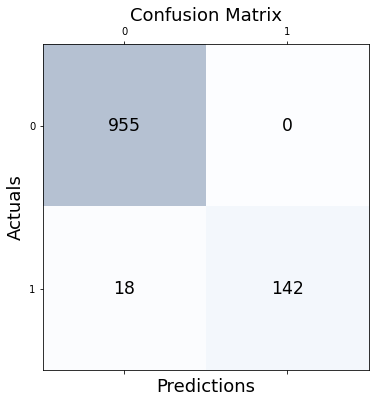

In [17]:
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()